# Prédictions : courbes d'apprentissages selon différents modèles et différents paramètres

Afin d'y voir un peu plus clair dans la jungle des paramètres possibles 

 + feature engineering avec différentes échelles
 + différents tactiques d'imputation de données
 + etc
 
 on va tracer des courbes d'apprentissage, afin de sélectionner les meilleures options.

In [19]:
library(here)
setwd(here())
print(getwd())
source(file="misc_functions.R")
source(file="experiments/learning_curve/learning_curve.R")
source(file="experiments/titanic_challenge/1_feature_engineering.R")

library(lattice)
library(gridExtra)
library(mice)
library(ggplot2)

library(randomForest)
library(e1071)

[1] "/home/sapristi/Documents/ML"


In [7]:
train.raw <- read.csv("datasets/titanic_na/train.csv")

remove.na <- function(df) {
    df$Fare[df$Fare == 0] <- NA
    narows <- is.na(df$Age) | (is.na(df$Fare))
    res <- df[!narows,]
    res$SurvivedF <- as.factor(res$Survived)
    return(res)
}

train.nona <- remove.na(train.raw)


## 1 Fonctions pour différents modèles

Fonction auxilière

In [32]:
features <- c("Pclass", "Sex", "Age", "SibSp", "Parch", "Fare")


logreg.model_fun <- function(formula, train) {
  return(glm(as.formula(formula), data = train, family = binomial(link = "logit")))
}
logreg.predict_fun <- function(model, data) {
  plogis(predict(model, data))
}


svm.linear.model_fun  <- function(formula, train) {
  return(svm(as.formula(formula), 
             data = train, kernel="linear", cost=50, coef0=1,
             type="C-classification"))
}


svm.logi.model_fun  <- function(formula, train) {
  return(svm(as.formula(formula), 
             data = train, kernel="sigmoid",  cost=50, coef0=1,
             type="C-classification"))
}


svm.poly.model_fun  <- function(formula, train) {
  return(svm(as.formula(formula), 
             data = train, kernel="polynomial", degree=3, cost=50, coef0=1,
             type="C-classification"))
}

rf.model_fun <- function(formula, train) {
  randomForest(as.formula(formula), 
               data = train, na.action = na.roughfix)
}


model_funs <- list(logreg = logreg.model_fun, svm.linear = svm.linear.model_fun, svm.logi = svm.logi.model_fun, 
                   svm.poly = svm.poly.model_fun, rf = rf.model_fun)
predict_funs <- list(logreg = logreg.predict_fun)

make_learning_curves <- function(model_funs, predict_funs, train, test, target, features, steps) {
    plot <- ggplot()
    for (model in names(model_funs)) {
        model_fun <- model_funs[[model]]
        predict_fun <- predict_funs[[model]]
        plot <- learning_curve$plot(train, test, target, features, model_fun, predict_fun, steps, title = model, previous_plot = plot)
    }
    return(plot)
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

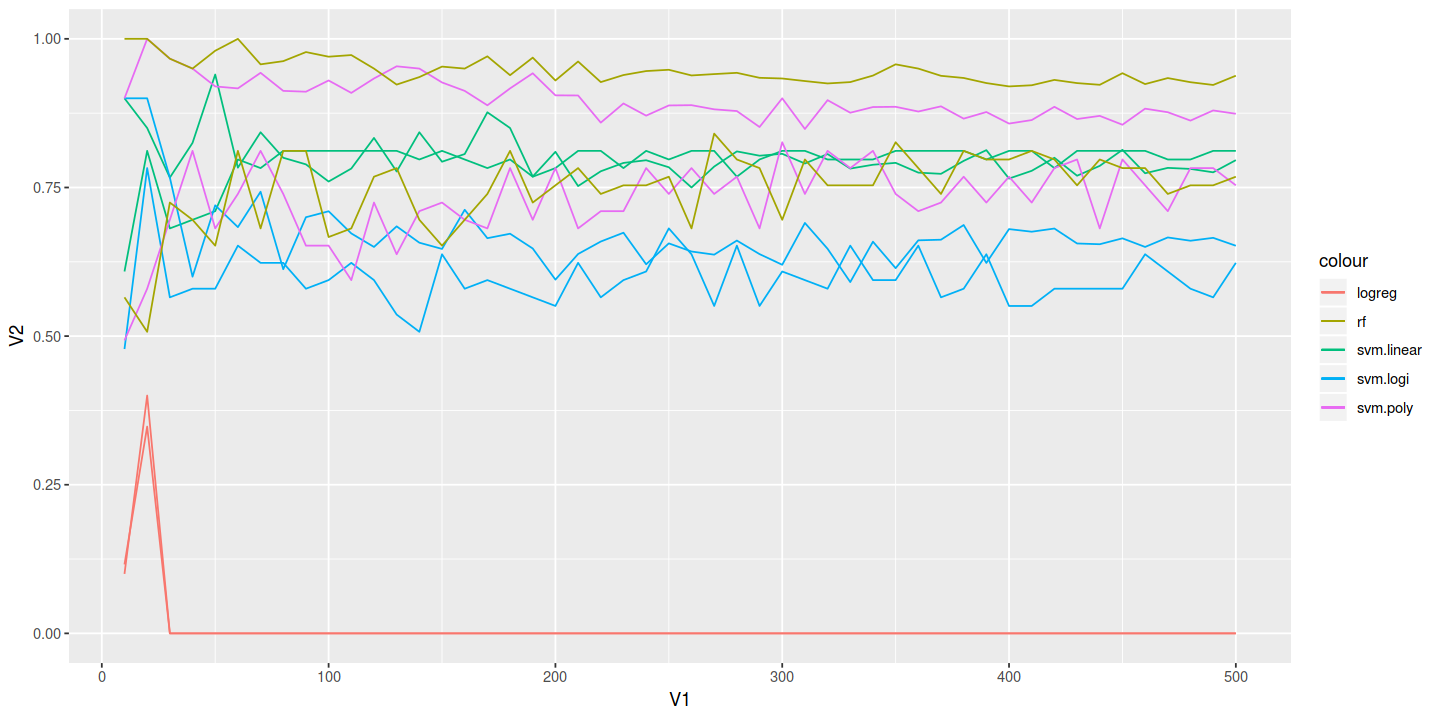

In [33]:
p <- make_learning_curves(model_funs, predict_funs, train.nona, 0.1, "SurvivedF",  features, steps=50)
print(p)